<a href="https://colab.research.google.com/github/costpetrides/Air-pollution-COVID-19-impact/blob/main/Correlation/GEO-Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geoponiki

In [16]:
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyparsing.helpers import PrecededBy
url='https://raw.githubusercontent.com/costpetrides/Air-pollution-COVID-19-impact/main/Lockdown%201/DATA/GeoponikiLock.csv'
df = pd.read_csv(url)
print(df)

       DAY  COMEAN  COMIN  COMAX  CO20  C021  O3MEAN  O3MIN  O3MAX  O320  ...  \
0    1-Mar     0.9    0.5    1.5   0.7   0.4      43     30     53    43  ...   
1    2-Mar     0.6    0.4    0.8   0.8   0.2      60     47     72    41  ...   
2    3-Mar     0.6    0.5    0.6   0.7   0.3      51     31     79    58  ...   
3    4-Mar     0.6    0.4    0.8   0.4   0.6      47     38     59    66  ...   
4    5-Mar     0.7    0.4    1.1   0.8   0.8      49     38     57    35  ...   
..     ...     ...    ...    ...   ...   ...     ...    ...    ...   ...  ...   
87  27-May     0.3    0.2    0.4   0.4   0.3      67     37     85    59  ...   
88  28-May     0.3    0.2    0.4   0.8   0.0      67     56     79    44  ...   
89  29-May     0.3    0.2    0.4   0.7   0.0      70     65     79    39  ...   
90  30-May     0.4    0.3    0.4   0.6   0.0      61     58     63    61  ...   
91  31-May     0.4    0.4    0.5   0.6   0.0      51     46     57    81  ...   

    NOMEAN  NOMIN  NOMAX  N

# $NO_{2}$

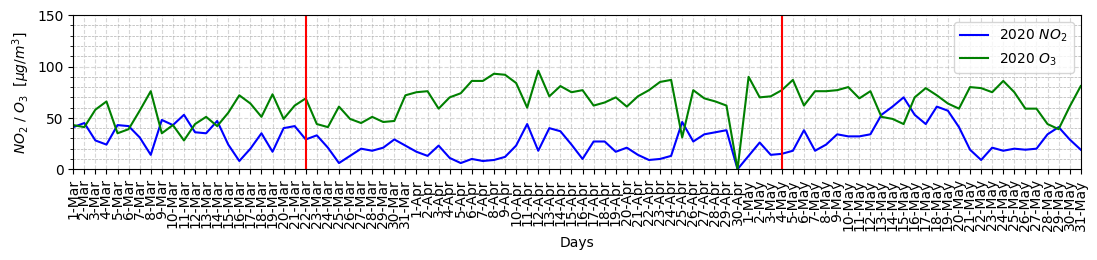

In [17]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$NO_{2}$ / $O_{3}$  $[μg/m^{3}]$')

plt.plot(df['DAY'], df['NO220'], 'b', label='2020 $NO_{2}$ ')
plt.plot(df['DAY'], df['O320'], 'g', label='2020 $O_{3}$')

plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,150)

plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(linestyle='--', alpha=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)
plt.grid(linestyle='--',alpha=0.5)
plt.show()

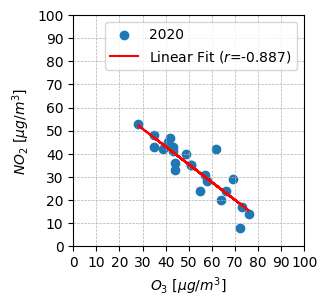

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd


# Plotting
plt.figure(figsize=(5, 3))
plt.xlabel('$O_{3}$ $[μg/m^{3}]$')
plt.ylabel('$NO_{2}$ $[μg/m^{3}]$')

# Filter zero values
x = df['O320'].values[:23]
y = df['NO220'].values[:23]
mask = (x != 0) & (y != 0)

plt.scatter(x[mask], y[mask], label='2020')

# Calculate Pearson correlation coefficient
r = stats.pearsonr(x[mask], y[mask])[0]

# Linear regression line
m, b = np.polyfit(x[mask], y[mask], 1)
plt.plot(x[mask], m*x[mask] + b, label=f'Linear Fit ($r$={r:.3f})', color='red')

plt.legend()
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 110, 10))
plt.grid(True)

# Set equal scaling
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.gca().set_xticks(np.arange(0, 110, 10), minor=True)
plt.gca().set_yticks(np.arange(0, 110, 10), minor=True)
plt.show()

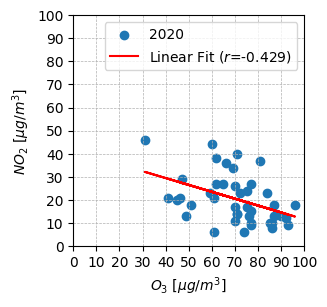

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd


# Plotting
plt.figure(figsize=(5, 3))
plt.xlabel('$O_{3}$ $[μg/m^{3}]$')
plt.ylabel('$NO_{2}$ $[μg/m^{3}]$')

# Filter zero values
x = df['O320'].values[23:66]
y = df['NO220'].values[23:66]
mask = (x != 0) & (y != 0)

plt.scatter(x[mask], y[mask], label='2020')

# Calculate Pearson correlation coefficient
r = stats.pearsonr(x[mask], y[mask])[0]


# Linear regression line
m, b = np.polyfit(x[mask], y[mask], 1)
plt.plot(x[mask], m*x[mask] + b, label=f'Linear Fit ($r$={r:.3f})', color='red')

plt.legend()
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 110, 10))
plt.grid(True)

# Set equal scaling
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.gca().set_xticks(np.arange(0, 110, 10), minor=True)
plt.gca().set_yticks(np.arange(0, 110, 10), minor=True)
plt.show()

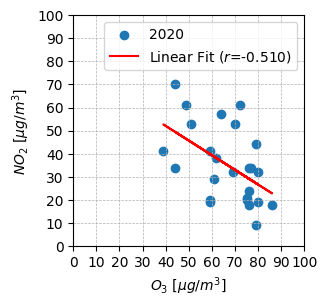

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd

# Assuming df is your DataFrame

# Calculate Pearson correlation coefficient
r = stats.pearsonr(df['O320'].values[66:91], df['NO220'].values[66:91])[0]

# Plotting
plt.figure(figsize=(5, 3))
plt.xlabel('$O_{3}$ $[μg/m^{3}]$')
plt.ylabel('$NO_{2}$ $[μg/m^{3}]$')

# Filter zero values
x = df['O320'].values[66:91]
y = df['NO220'].values[66:91]
mask = (x != 0) & (y != 0)

plt.scatter(x[mask], y[mask], label='2020')

# Linear regression line
m, b = np.polyfit(x[mask], y[mask], 1)
plt.plot(x[mask], m*x[mask] + b, label=f'Linear Fit ($r$={r:.3f})', color='red')

plt.legend()
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 110, 10))
plt.grid(True)

# Set equal scaling
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.gca().set_xticks(np.arange(0, 110, 10), minor=True)
plt.gca().set_yticks(np.arange(0, 110, 10), minor=True)
plt.show()

# NO

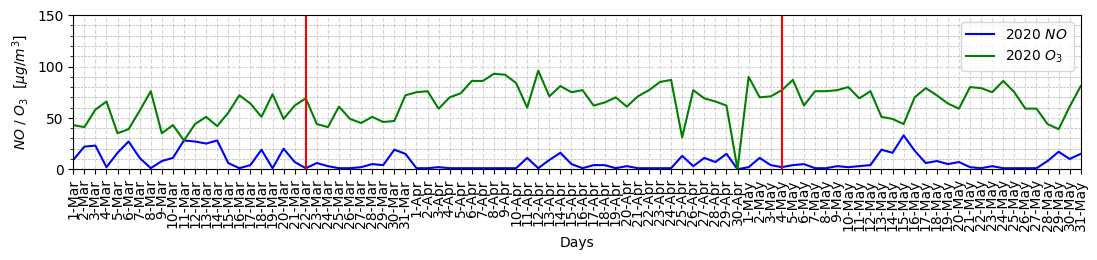

In [18]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$NO$ / $O_{3}$  $[μg/m^{3}]$')

plt.plot(df['DAY'], df['NO20'], 'b', label='2020 $NO$ ')
plt.plot(df['DAY'], df['O320'], 'g', label='2020 $O_{3}$')

plt.legend()

plt.ylim(0,80)
plt.xlim(0,70)

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,150)

plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(linestyle='--', alpha=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)
plt.grid(linestyle='--',alpha=0.5)
plt.show()

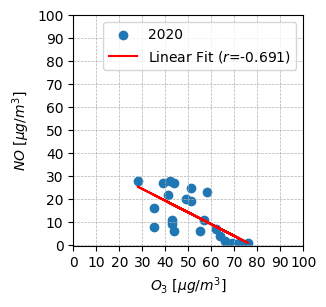

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd


# Plotting
plt.figure(figsize=(5, 3))
plt.xlabel('$O_{3}$ $[μg/m^{3}]$')
plt.ylabel('$NO$ $[μg/m^{3}]$')

# Filter zero values
x = df['O320'].values[:23]
y = df['NO20'].values[:23]
mask = (x != 0) & (y != 0)

plt.scatter(x[mask], y[mask], label='2020')

# Calculate Pearson correlation coefficient
r = stats.pearsonr(x[mask], y[mask])[0]

# Linear regression line
m, b = np.polyfit(x[mask], y[mask], 1)
plt.plot(x[mask], m*x[mask] + b, label=f'Linear Fit ($r$={r:.3f})', color='red')

plt.legend()
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 110, 10))

# Set equal scaling
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.gca().set_xticks(np.arange(0, 100, 10), minor=True)
plt.gca().set_yticks(np.arange(0, 100, 10), minor=True)
plt.show()

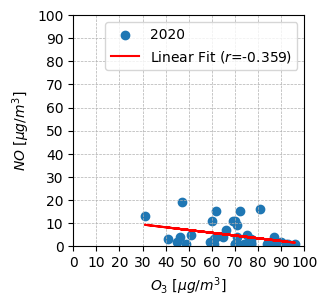

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd


# Plotting
plt.figure(figsize=(5, 3))
plt.xlabel('$O_{3}$ $[μg/m^{3}]$')
plt.ylabel('$NO$ $[μg/m^{3}]$')

# Filter zero values
x = df['O320'].values[23:66]
y = df['NO20'].values[23:66]
mask = (x != 0) & (y != 0)

plt.scatter(x[mask], y[mask], label='2020')

# Calculate Pearson correlation coefficient
r = stats.pearsonr(x[mask], y[mask])[0]

# Linear regression line
m, b = np.polyfit(x[mask], y[mask], 1)
plt.plot(x[mask], m*x[mask] + b, label=f'Linear Fit ($r$={r:.3f})', color='red')

plt.legend()
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 110, 10))
plt.ylim(0, 100)
plt.xlim(0, 100)


# Set equal scaling
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.gca().set_xticks(np.arange(0, 100, 10), minor=True)
plt.gca().set_yticks(np.arange(0, 100, 10), minor=True)
plt.show()

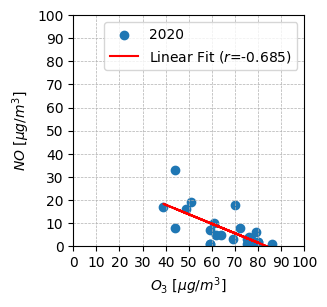

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd


# Plotting
plt.figure(figsize=(5, 3))
plt.xlabel('$O_{3}$ $[μg/m^{3}]$')
plt.ylabel('$NO$ $[μg/m^{3}]$')

# Filter zero values
x = df['O320'].values[66:91]
y = df['NO20'].values[66:91]
mask = (x != 0) & (y != 0)

plt.scatter(x[mask], y[mask], label='2020')

# Calculate Pearson correlation coefficient
r = stats.pearsonr(x[mask], y[mask])[0]

# Linear regression line
m, b = np.polyfit(x[mask], y[mask], 1)
plt.plot(x[mask], m*x[mask] + b, label=f'Linear Fit ($r$={r:.3f})', color='red')

plt.legend()
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 110, 10))
plt.xlim(0, 100)
plt.ylim(0, 100)

# Set equal scaling
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.gca().set_xticks(np.arange(0, 100, 10), minor=True)
plt.gca().set_yticks(np.arange(0, 100, 10), minor=True)
plt.show()


# CO

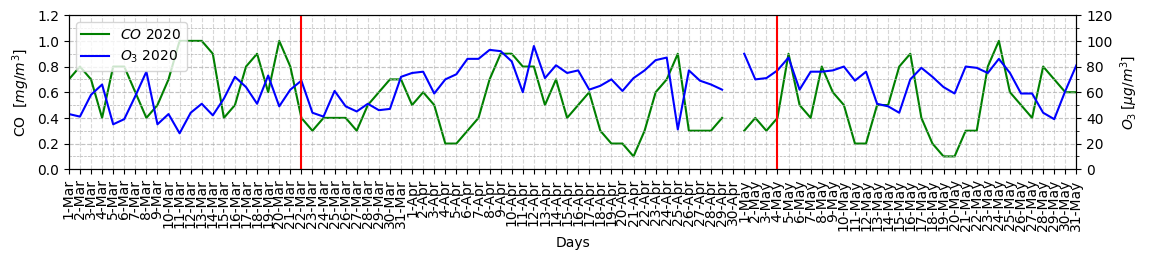

In [19]:
fig,ax = plt.subplots(figsize=(13, 2))

x=[]
for i in df['CO20']:
  if i==0:
    x+=[None]
  else:
    x+=[i]

y=[]
for i in df['O320']:
  if i==0:
    y+=[None]
  else:
    y+=[i]

ax.plot(df['DAY'], x, 'g', label='$CO$ 2020')
plt.xticks(rotation=90)

ax2=ax.twinx()
ax2.plot(df['DAY'], y, 'b', label='$O_{3}$ 2020')

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,150)
plt.xticks(rotation=90)

plt.xticks(rotation=90)

plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')

ax.set_xlabel('Days')
ax.set_ylabel(r"CO  $[mg/m^{3}$]")
ax2.set_ylabel(r"$O_{3} \: [μg/m^{3}$]")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.set_yticks(np.arange(0, 1.4, 0.2))
ax2.set_yticks(np.arange(0, 140, 20))
ax.set_ylim(0, 1.2)
ax2.set_ylim(0, 120)
ax.grid(linestyle='--', alpha=0.5)

plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(linestyle='--', alpha=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.show()

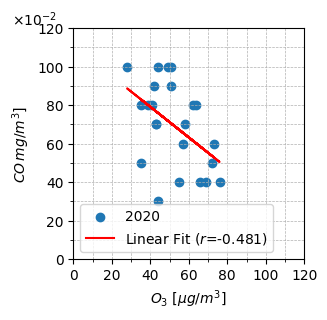

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd

# Plotting
plt.figure(figsize=(3, 3))
plt.xlabel('$O_{3}$ $[μg/m^{3}]$')
plt.ylabel('$CO  \, mg/m^{3}]$')  # Adjusted y-axis label

# Filter zero values
x = df['O320'].values[0:23]
y = df['CO20'].values[0:23]
mask = (x != 0) & (y != 0)

plt.scatter(x[mask], y[mask]*100, label='2020')

# Calculate Pearson correlation coefficient
r = stats.pearsonr(x[mask], y[mask])[0]

# Linear regression line
m, b = np.polyfit(x[mask], y[mask]*100, 1)
plt.plot(x[mask], m*x[mask] + b, label=f'Linear Fit ($r$={r:.3f})', color='red')

plt.legend()
plt.xticks(np.arange(0, 140, 20))
plt.yticks(np.arange(0, 140, 20))


plt.gca().set_aspect('auto', adjustable='box')
plt.annotate('$\\times 10^{-2}$', xy=(-0.07, 1), xycoords='axes fraction',
             fontsize=10, ha='right', va='bottom')


# Set equal scaling
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.gca().set_xticks(np.arange(0, 120, 10), minor=True)
plt.gca().set_yticks(np.arange(0, 120, 10), minor=True)
plt.show()

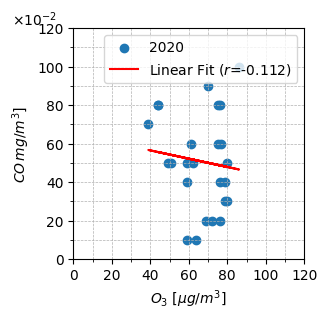

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd

# Plotting
plt.figure(figsize=(3, 3))
plt.xlabel('$O_{3}$ $[μg/m^{3}]$')
plt.ylabel('$CO  \, mg/m^{3}]$')  # Adjusted y-axis label

# Filter zero values
x = df['O320'].values[66:91]
y = df['CO20'].values[66:91]
mask = (x != 0) & (y != 0) & (y <= 160)

plt.scatter(x[mask], y[mask]*100, label='2020')

# Calculate Pearson correlation coefficient
r = stats.pearsonr(x[mask], y[mask])[0]

# Linear regression line
m, b = np.polyfit(x[mask], y[mask]*100, 1)
plt.plot(x[mask], m*x[mask] + b, label=f'Linear Fit ($r$={r:.3f})', color='red')

plt.legend()
plt.xticks(np.arange(0, 140, 20))
plt.yticks(np.arange(0, 140, 20))
plt.xlim(0, 120)
plt.ylim(0, 120)


plt.gca().set_aspect('auto', adjustable='box')
plt.annotate('$\\times 10^{-2}$', xy=(-0.07, 1), xycoords='axes fraction',
             fontsize=10, ha='right', va='bottom')

# Set equal scaling
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.gca().set_xticks(np.arange(0, 120, 10), minor=True)
plt.gca().set_yticks(np.arange(0, 120, 10), minor=True)
plt.show()

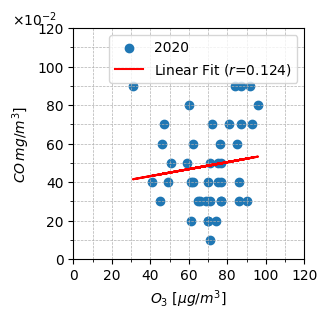

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd

# Plotting
plt.figure(figsize=(3, 3))
plt.xlabel('$O_{3}$ $[μg/m^{3}]$')
plt.ylabel('$CO  \, mg/m^{3}]$')  # Adjusted y-axis label

# Filter zero values
x = df['O320'].values[23:66]
y = df['CO20'].values[23:66]
mask = (x != 0) & (y != 0)

plt.scatter(x[mask], y[mask]*100, label='2020')

# Calculate Pearson correlation coefficient
r = stats.pearsonr(x[mask], y[mask])[0]

# Linear regression line
m, b = np.polyfit(x[mask], y[mask]*100, 1)
plt.plot(x[mask], m*x[mask] + b, label=f'Linear Fit ($r$={r:.3f})', color='red')

plt.legend()
plt.xticks(np.arange(0, 140, 20))
plt.yticks(np.arange(0, 140, 20))
plt.xlim(0, 120)
plt.ylim(0, 120)

plt.gca().set_aspect('auto', adjustable='box')
plt.annotate('$\\times 10^{-2}$', xy=(-0.07, 1), xycoords='axes fraction',
             fontsize=10, ha='right', va='bottom')

# Set equal scaling
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.gca().set_xticks(np.arange(0, 120, 10), minor=True)
plt.gca().set_yticks(np.arange(0, 120, 10), minor=True)
plt.show()
